# 4.CLUSTERS

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

### Leyendo CSV

In [6]:
file_name1 = dir_origen_csv + "Data_filt_horas_ceros.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")

## CLUSTERS GEOGRAFICOS

### Dataset de medidores filtrados con su latitud y longitud

In [7]:
df_filtrado_geo = df[['medidor','Latitud','Longitud']].groupby('medidor').mean()
df_filtrado_geo

,Latitud,Longitud
medidor,,
15029828,-1.85053,-79.4001
15029835,-1.56845,-79.4733
15029844,-1.62801,-79.5566
15029846,-1.54981,-79.7512
15029847,-1.79919,-79.5334
15029974,-1.56032,-79.7599
15029977,-1.44379,-79.7628
15842884,-1.55775,-79.7517
15842885,-1.79843,-79.5270


### Aplicando DBSCAN para obtener clusters geograficos

In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [8]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.1).fit(df_filtrado_geo)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[-1  0  0  1  0  1 -1  1  0  0 -1 -1  0  0  0  0 -1 -1 -1 -1  2  0  0  0
  0  0  0  2  0  2 -1 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  2  0  0  0  0  0  0  0  0  2  2  0 -1  2  2  0  0  0  0  0  0  0  0  0
  0  2  2  1  0  0  0  2  0  0  0  1  0  1  0  0  0  2  0 -1  0  0  0  1
  2  0  0  2  0]
Estimated number of clusters: 3
Estimated number of noise points: 12


In [9]:
df_filtrado_cluster = df_filtrado_geo
df_filtrado_cluster['ClustersGeograficos'] = labels
df_filtrado_cluster

,Latitud,Longitud,ClustersGeograficos
medidor,,,
15029828,-1.85053,-79.4001,-1
15029835,-1.56845,-79.4733,0
15029844,-1.62801,-79.5566,0
15029846,-1.54981,-79.7512,1
15029847,-1.79919,-79.5334,0
15029974,-1.56032,-79.7599,1
15029977,-1.44379,-79.7628,-1
15842884,-1.55775,-79.7517,1
15842885,-1.79843,-79.5270,0


In [10]:
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                            average_method='arithmetic'))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

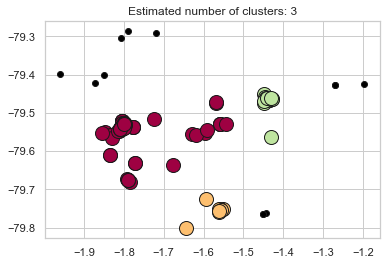

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(type(xy))
    #print(xy)
    xy = df_filtrado_cluster[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_filtrado_cluster[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()

## Clúster de factor de potencia

In [ ]:
#medidores = list(df_filtrado_horas["medidor"].unique())
#nodos = open("nodos.csv", "w")
#nodos.write("id,label,powerfactor\n")
#nodo_1 = []
#for i,m in enumerate(medidores):
 #   lat = str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["Latitud"].unique()[0])
 #   long = str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["Longitud"].unique()[0])
#    powerfactor=str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["powerfactorsystem"].mean())
#  if not(lat == "0.0" and long == "0.0"):
  #      nodos.write(str(i+1)+","+str(m)+","+powerfactor+"\n")
   #     nodo_1.append(m)
#nodos.close()

In [15]:
df_factorP=df[["medidor","powerfactorsystem"]].groupby("medidor").mean()
df_power=df_factorP.sample(int(df_factorP.shape[0]*0.80))
df_power

,powerfactorsystem
medidor,
52073259,0.974602
16951209,0.895825
52073240,0.962143
52073218,0.962155
52073292,0.895054
15029974,0.952461
52073382,0.967160
15029847,0.939273
52071447,0.936087


k: 1  cost: 7.2371606377091116
k: 2  cost: 0.7417724628385772
k: 3  cost: 0.3502915129550447
k: 4  cost: 0.20994676021663072
k: 5  cost: 0.10117096352649639
k: 6  cost: 0.0624344151476436
k: 7  cost: 0.04340247483947485
k: 8  cost: 0.0303099608162362
k: 9  cost: 0.019850817153949974


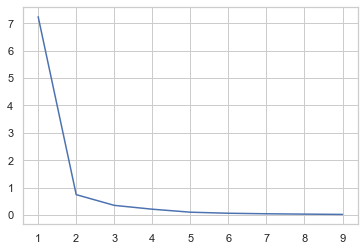

In [16]:
from sklearn.cluster import KMeans
 
A=df_power
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random')
X=df_power.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [18]:
kmeans.cluster_centers_

array([[0.91163353],
       [0.18159591]])

In [19]:
distance=kmeans.fit_transform(X)
distance

array([[6.29682404e-02, 7.93005861e-01],
       [1.58080338e-02, 7.14229587e-01],
       [5.05093276e-02, 7.80546948e-01],
       [5.05211666e-02, 7.80558787e-01],
       [1.65791817e-02, 7.13458439e-01],
       [4.08273528e-02, 7.70864973e-01],
       [5.55269643e-02, 7.85564585e-01],
       [2.76396133e-02, 7.57677234e-01],
       [2.44534270e-02, 7.54491047e-01],
       [3.43258372e-02, 6.95711783e-01],
       [2.80331371e-02, 7.58070758e-01],
       [6.77784157e-01, 5.22534632e-02],
       [8.60224184e-02, 6.44015202e-01],
       [5.53323349e-03, 7.35570854e-01],
       [1.90981778e-02, 7.49135798e-01],
       [8.24668889e-02, 8.12504509e-01],
       [8.66059759e-01, 1.36022139e-01],
       [4.44454042e-01, 2.85583578e-01],
       [5.64161382e-02, 6.73621482e-01],
       [5.98109149e-02, 7.89848535e-01],
       [9.11633530e-01, 1.81595909e-01],
       [2.26788809e-01, 5.03248811e-01],
       [4.24869778e-02, 6.87550643e-01],
       [4.83001962e-02, 6.81737424e-01],
       [1.380603

In [20]:
labels=kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
df_consumo = df_power
df_consumo['ClustersConsumo'] = labels
df_consumo

,powerfactorsystem,ClustersConsumo
medidor,,
52073259,0.974602,0
16951209,0.895825,0
52073240,0.962143,0
52073218,0.962155,0
52073292,0.895054,0
15029974,0.952461,0
52073382,0.967160,0
15029847,0.939273,0
52071447,0.936087,0


## CLUSTERS ELECTRICOS

In [22]:
dfelec=df[["medidor","voltajeA","voltajeB","voltajeC","corrienteA","corrienteB","corrienteC","angvoltajeA","angvoltajeB","angvoltajeC","angcorrienteA","angcorrienteB","angcorrienteC"]].groupby("medidor").mean()
dfelec

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC
medidor,,,,,,,,,,,,
15029828,114.033543,117.097061,114.459439,2.379338,0.571591,1.131929,0.0,120.188088,239.717868,277.071470,71.555045,169.359724
15029835,125.551201,124.360481,126.617977,0.160938,0.114581,0.148513,0.0,240.000000,120.000000,101.438368,243.000016,97.189675
15029844,272.781297,268.488425,270.056514,0.059670,0.045635,0.065991,0.0,120.084507,239.915493,49.047401,121.570651,244.845418
15029846,116.642239,108.174467,108.252535,2.334004,3.050720,3.041813,0.0,120.000000,240.000000,323.184023,97.802242,250.098790
15029847,123.766177,124.318756,122.948835,0.526322,0.467777,0.520437,0.0,240.000000,120.000000,203.005052,228.049778,139.247523
15029974,110.732251,108.629564,108.072886,1.344759,1.257711,1.038958,0.0,240.000000,120.000000,48.019401,240.149697,129.375614
15029977,264.334891,266.518957,261.835133,0.659439,0.713172,0.644015,0.0,240.000000,120.000000,14.824380,251.562967,130.982908
15842884,233.424865,0.000000,0.000000,33.528917,0.000000,0.000000,0.0,0.000000,0.000000,13.201550,0.000000,0.000000
15842885,246.684014,0.000000,0.000000,18.568396,0.000000,0.000000,0.0,0.000000,0.000000,127.622803,0.000000,0.000000


In [23]:
dfelec_escalado = (dfelec-dfelec.min())/(dfelec.max()-dfelec.min())
dfelec_escalado
dfelec_escalado.fillna(0, inplace=True)
dfelec_escalado

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC
medidor,,,,,,,,,,,,
15029828,0.017115,0.174492,0.169109,0.046921,0.021501,0.019101,0.0,0.145893,0.297014,0.798413,0.264375,0.585356
15029835,0.037438,0.185315,0.187072,0.003174,0.004310,0.002506,0.0,0.291330,0.148682,0.292306,0.897815,0.335916
15029844,0.297237,0.400087,0.398996,0.001177,0.001717,0.001114,0.0,0.145767,0.297258,0.141336,0.449169,0.846256
15029846,0.021718,0.161196,0.159938,0.046027,0.114758,0.051329,0.0,0.145665,0.297363,0.931291,0.361351,0.864414
15029847,0.034289,0.185253,0.181651,0.010379,0.017596,0.008782,0.0,0.291330,0.148682,0.584982,0.842579,0.481280
15029974,0.011289,0.161874,0.159673,0.026519,0.047311,0.017532,0.0,0.291330,0.148682,0.138373,0.887284,0.447159
15029977,0.282333,0.397152,0.386850,0.013004,0.026827,0.010867,0.0,0.291330,0.148682,0.042718,0.929453,0.452715
15842884,0.227790,0.000000,0.000000,0.661195,0.000000,0.000000,0.0,0.000000,0.000000,0.038042,0.000000,0.000000
15842885,0.251186,0.000000,0.000000,0.366171,0.000000,0.000000,0.0,0.000000,0.000000,0.367760,0.000000,0.000000


k: 1  cost: 75.09308436634169
k: 2  cost: 40.348895837880235
k: 3  cost: 29.585314826819854
k: 4  cost: 24.811029255899655
k: 5  cost: 20.113290415493758
k: 6  cost: 17.754024572218807
k: 7  cost: 15.660918171517618
k: 8  cost: 14.084600237457394
k: 9  cost: 12.033786311900204


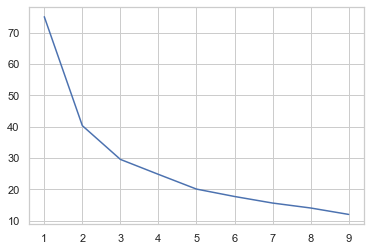

In [24]:
from sklearn.cluster import KMeans
 
A=dfelec_escalado
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=dfelec_escalado.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [26]:
kmeans.cluster_centers_

array([[ 5.79187721e-02,  2.00853236e-01],
       [ 9.59278463e-01,  9.72898541e-01],
       [ 1.39452414e-01, -1.66533454e-16]])

In [27]:
distance=kmeans.fit_transform(X)
distance

array([[0.04857892, 0.21310531, 1.23496002],
       [0.0257075 , 0.21153861, 1.21246715],
       [0.31139572, 0.43007612, 0.8754496 ],
       [0.05369569, 0.19961331, 1.24011346],
       [0.02831522, 0.21302139, 1.21490399],
       [0.06077586, 0.20646778, 1.24757549],
       [0.29815243, 0.42207171, 0.88867288],
       [0.26305543, 0.0883373 , 1.21721295],
       [0.27873721, 0.11173408, 1.20329789],
       [0.28076296, 0.11464439, 1.20158759],
       [0.26206327, 0.0867968 , 1.21813934],
       [0.05211951, 0.20204797, 1.23875817],
       [1.15655767, 1.24293847, 0.0304116 ],
       [1.16839931, 1.25661728, 0.02407399],
       [0.01421121, 0.21636997, 1.20053699],
       [0.00200766, 0.21801644, 1.18790977],
       [0.06332748, 0.21004581, 1.2499868 ],
       [0.05971061, 0.20698102, 1.24650294],
       [0.05045557, 0.21713428, 1.23616242],
       [0.05041505, 0.21723164, 1.23610168],
       [1.18406054, 1.27015302, 0.00461507],
       [1.17692009, 1.26335563, 0.01118483],
       [1.

In [28]:
labels=kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [29]:
df_elec_cluster = dfelec
df_elec_cluster['ClustersElectricos'] = labels
df_elec_cluster

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC,ClustersElectricos
medidor,,,,,,,,,,,,,
15029828,114.033543,117.097061,114.459439,2.379338,0.571591,1.131929,0.0,120.188088,239.717868,277.071470,71.555045,169.359724,0
15029835,125.551201,124.360481,126.617977,0.160938,0.114581,0.148513,0.0,240.000000,120.000000,101.438368,243.000016,97.189675,0
15029844,272.781297,268.488425,270.056514,0.059670,0.045635,0.065991,0.0,120.084507,239.915493,49.047401,121.570651,244.845418,0
15029846,116.642239,108.174467,108.252535,2.334004,3.050720,3.041813,0.0,120.000000,240.000000,323.184023,97.802242,250.098790,0
15029847,123.766177,124.318756,122.948835,0.526322,0.467777,0.520437,0.0,240.000000,120.000000,203.005052,228.049778,139.247523,0
15029974,110.732251,108.629564,108.072886,1.344759,1.257711,1.038958,0.0,240.000000,120.000000,48.019401,240.149697,129.375614,0
15029977,264.334891,266.518957,261.835133,0.659439,0.713172,0.644015,0.0,240.000000,120.000000,14.824380,251.562967,130.982908,0
15842884,233.424865,0.000000,0.000000,33.528917,0.000000,0.000000,0.0,0.000000,0.000000,13.201550,0.000000,0.000000,1
15842885,246.684014,0.000000,0.000000,18.568396,0.000000,0.000000,0.0,0.000000,0.000000,127.622803,0.000000,0.000000,1


# SERIES DE TIEMPO (RESAMPLE CADA 8H)

In [ ]:
dfff = pd.DataFrame()
count=0
for n,g in df.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("8H").mean()
    if(count==0):
        dfff=g
    else:
        dfff=pd.concat(dfff,g)
dfff

In [ ]:
dfff.index